# IE406 Machine Learning
## LAB-1

### Devdeep Shetrajiwala : 202001150
### Divya Patel : 202001420

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression 
from scipy import optimize   
import imageio
import os
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler 
plt.rcParams['font.family'] = 'serif'

## Q1

---

Implement polynomial regression as a special case of linear regression. First, generate some data using the following method:

```python
import numpy as np

x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1 * x**5 + 3 * x**4 - 100 * x**3 + 8 * x**2 - 300 * x - 1e5 + np.random.randn(len(x)) * 1e5
```

The goal is to learn a polynomial function of degree `p` on this dataset, <br> where `y = q0 + q1 * x1 + q2 * x2 + ... + qp * xp`.

This can be achieved by using linear regression implementations, transforming the dataset and creating the matrix `X` containing columns corresponding to `x0`, `x1`, `x2`, ..., `xp`. Using any suitable implementation, learn the regression coefficients for `p = 5` and `p = 4`.

Compare the coefficients for `p = 5` to the ones used to generate the data. How close are they?

---


In [73]:
def polynomial_regression(X, y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    theta = lin_reg.coef_
    theta[0] = lin_reg.intercept_
    return theta


def driver_function(p, x, y, df_ans):
    X = [x**(i) for i in range(p+1)]
    X = np.array(X).reshape(p+1, y.shape[0]).transpose()
    
    ans_LR = polynomial_regression(X, y)
    df_ans.append(ans_LR)
    y_hat_LR = np.matmul(X, np.transpose(ans_LR))
    rmse = np.sqrt(mse(y, y_hat_LR))
    print(f'RMSE for p={p} Linear Regression: {rmse}')
    plt.plot(x, np.abs(y - y_hat_LR), 'r--')
    plt.grid()
    plt.xlabel('x', fontsize=12)
    plt.ylabel('|y - ŷ|', fontsize=12)
    plt.title(f'Polynomial Regression p = {p} Error', fontsize=12)
    plt.show()
    
    return y_hat_LR 


x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
theta0 = np.random.randn()
real_theta = [(-1 + theta0)*1e5, -300, 8, -100, 3, 1]
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + theta0*1e5



RMSE for p=4 Linear Regression: 3922.7237480851986


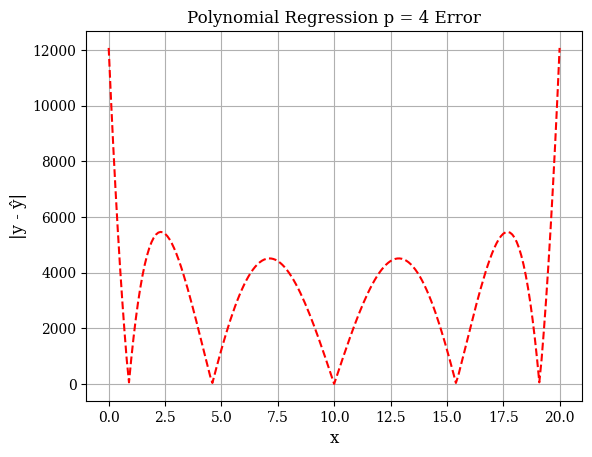

RMSE for p=5 Linear Regression: 3.415148847975915e-08


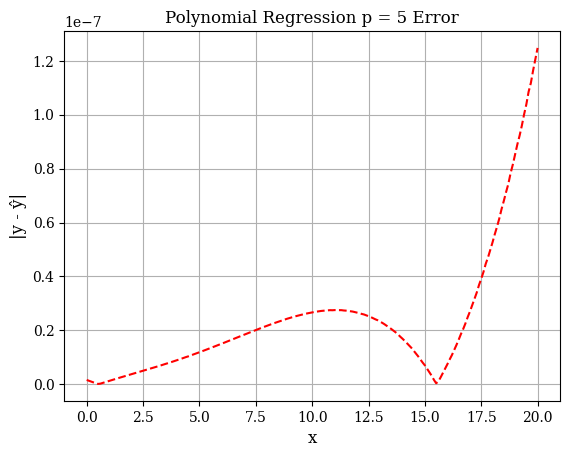

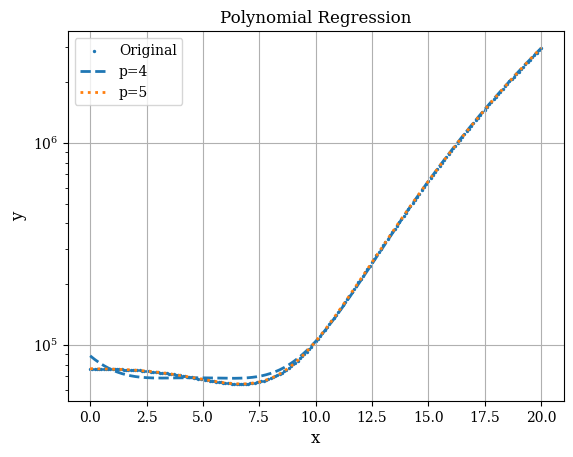

Co-efficients of the polynomial regression are: 


Degree        Real θ        LR p=4        LR p=5
0     0.0  76405.234597  88479.758597  76405.234597
1     1.0   -300.000000 -19066.341289   -300.000000
2     2.0      8.000000   6641.833333      8.000000
3     3.0   -100.000000   -987.794444   -100.000000
4     4.0      3.000000     53.000000      3.000000
5     5.0      1.000000           NaN      1.000000

In [78]:
df_ans = []
y_hat_NE = []
y_hat_LR= []
df_ans.append([i for i in range(6)])
df_ans.append(real_theta)

predictions = []
for p in range(4,6):
    temp = driver_function(p,x,y,df_ans)
    predictions.append(temp)

ans = pd.DataFrame(df_ans).T
ans.columns= ['Degree','Real θ','LR p=4','LR p=5']

plt.scatter(x,y,label='Original',s=2,marker='o')
plt.plot(x,predictions[0],label='p=4',linestyle='--',linewidth= 2)
plt.plot(x,predictions[1],label='p=5',linestyle='dotted', linewidth=2)

plt.grid()
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Polynomial Regression', fontsize=12)
plt.legend()
plt.yscale('log')
plt.show()

print("Co-efficients of the polynomial regression are: ")
ans.head(6)

### NOTE : Y-axis is in log scale


### Hence as observed above the polynomial co-efficients are very close to the ones used to generate the data for p =5. 

**The curves seems quite overlapping for p=4 and p=5 but RMSE is less for p=5.**

## Q2

---

Use the Gradient Descent method to find the minima of the following functions. Experiment with different learning rates, such as 0.01 and 0.1, and different numbers of iterations. Test the convergence by choosing a large value for the learning rate. For function L5(q), use the provided data file.

---


A). $L_1(\theta) = \theta^2$


For alpha = 0.1 and iterations = 50:
Minimum value of L(θ) is 3.182868713022636e-08 at θ = 0.00017840596158824503


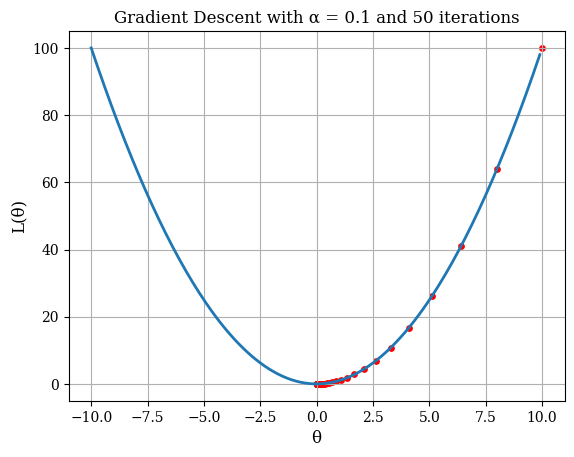

For alpha = 0.1 and iterations = 100:
Minimum value of L(θ) is 6.483618076376561e-18 at θ = 2.5462949704181095e-09


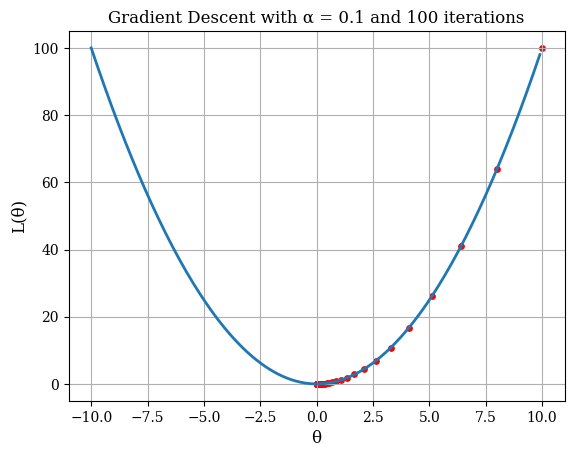

For alpha = 0.01 and iterations = 100:
Minimum value of L(θ) is 1.8313147236278182 at θ = 1.353260774436257


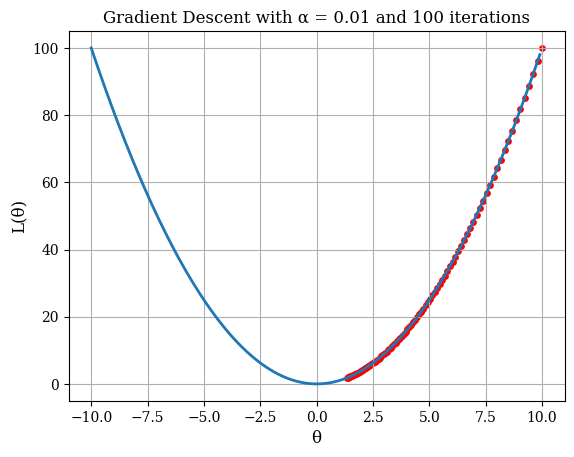

For alpha = 0.01 and iterations = 1000:
Minimum value of L(θ) is 2.9491661031387704e-16 at θ = 1.7173136298122048e-08


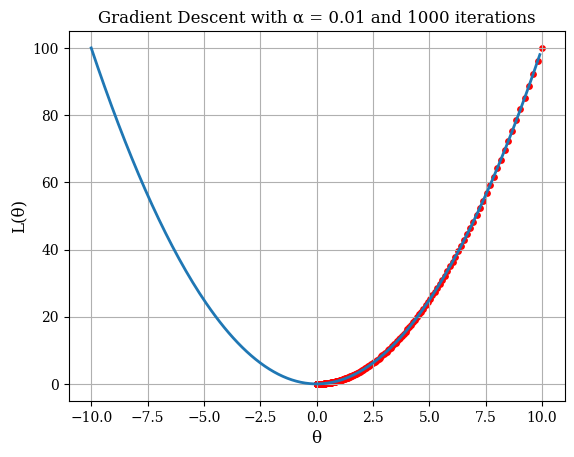

In [27]:

def L(theta):
    return theta * theta

def gradient_descent(iterations, alpha, starting_val):
    gradient_plot = [starting_val]
    for i in range(iterations - 1):
        gradient_plot.append(gradient_plot[-1] - alpha * 2 * gradient_plot[-1])
    gradient_plot = np.asarray(gradient_plot)
    return gradient_plot

def wrapper_function(alpha, iterations):
    theta = np.arange(-10, 10, 0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iter_plot = gradient_descent(iterations, alpha, 10)
    
    print(f'Minimum value of L(θ) is {L(iter_plot[-1])} at θ = {iter_plot[-1]}')
    plt.figure()
    plt.plot(theta, L_theta, linewidth=2)
    plt.scatter(iter_plot, L(iter_plot), c='red',s=15)
    plt.grid()
    plt.xlabel('θ', fontsize=12)
    plt.ylabel('L(θ)', fontsize=12)
    plt.title(f'Gradient Descent with α = {alpha} and {iterations} iterations', fontsize=12)
    plt.show()

print("For alpha = 0.1 and iterations = 50:")
wrapper_function(0.1, 50)

print("For alpha = 0.1 and iterations = 100:")
wrapper_function(0.1, 100)

print("For alpha = 0.01 and iterations = 100:")
wrapper_function(0.01, 100)

print("For alpha = 0.01 and iterations = 1000:")
wrapper_function(0.01, 1000)


B). $L_2(\theta) = \theta_1^2 + \theta_2^2$


For alpha = 0.1 and iterations = 50:
Minimum value of L(θ1, θ2) is 6.365737426045272e-08  at θ1 =  0.00017840596158824503  at θ2 =  0.00017840596158824503


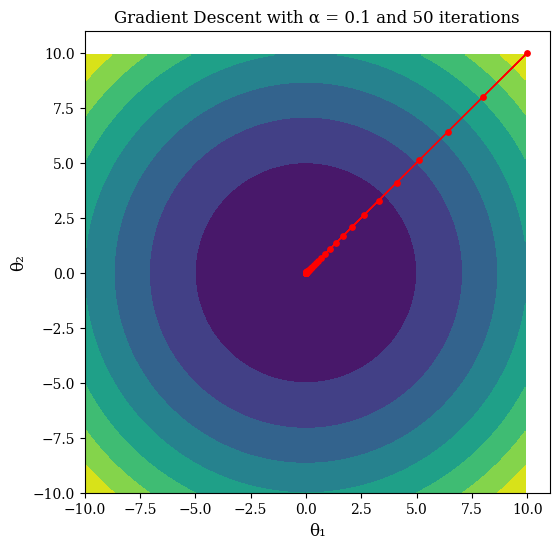

For alpha = 0.1 and iterations = 100:
Minimum value of L(θ1, θ2) is 1.2967236152753122e-17  at θ1 =  2.5462949704181095e-09  at θ2 =  2.5462949704181095e-09


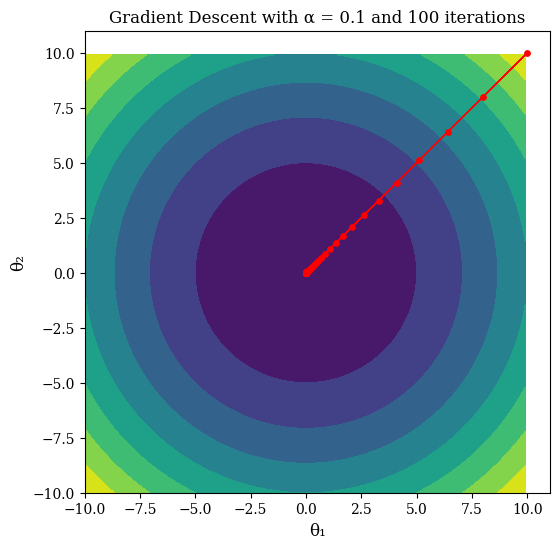

For alpha = 0.01 and iterations = 100:
Minimum value of L(θ1, θ2) is 3.6626294472556364  at θ1 =  1.353260774436257  at θ2 =  1.353260774436257


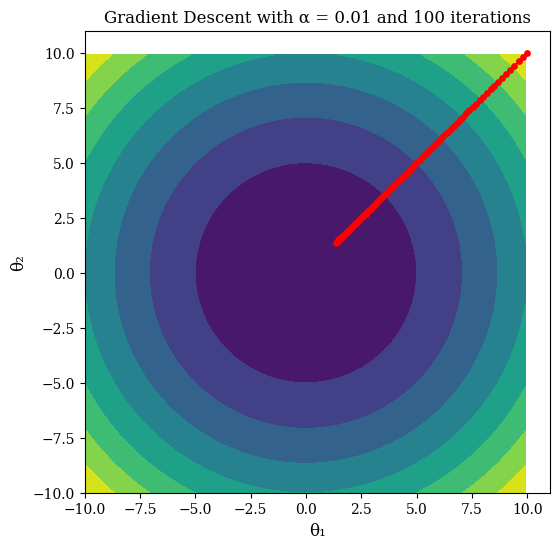

For alpha = 0.01 and iterations = 1000:
Minimum value of L(θ1, θ2) is 5.898332206277541e-16  at θ1 =  1.7173136298122048e-08  at θ2 =  1.7173136298122048e-08


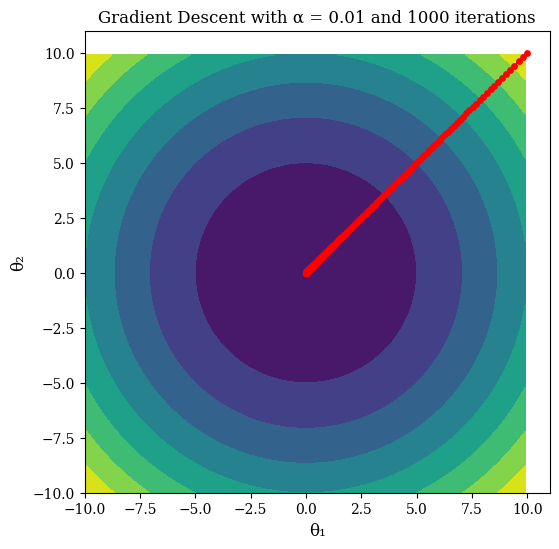

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def L(theta1, theta2):
    return theta1*theta1 + theta2*theta2

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*2*gradientPlot1[-1])
        gradientPlot2.append(gradientPlot2[-1] - alpha*2*gradientPlot2[-1])

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):
    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    ans1,ans2  = gradientDescent(iterations,alpha,10)

    print('Minimum value of L(θ1, θ2) is', L(ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])
    
    fig = plt.figure(figsize=(6,6))
    
    X, Y = np.meshgrid(theta1, theta2)
    Z = L(X,Y)
    
    plt.contourf(X,Y,Z,cmap='viridis')
    
    plt.scatter(ans1,ans2,c='red',s=15)
    
    plt.xlabel('θ₁', fontsize=12)
    plt.ylabel('θ₂', fontsize=12)
    
    plt.title(f'Gradient Descent with α = {alpha} and {iterations} iterations', fontsize=12)
    
    for i in range(len(ans1)-1):
        plt.arrow(ans1[i], ans2[i], ans1[i+1]-ans1[i], ans2[i+1]-ans2[i], head_width=0.02, head_length=0.02, fc='red', ec='red')
    
    plt.show()

print("For alpha = 0.1 and iterations = 50:")
driverFunc(0.1, 50)

print("For alpha = 0.1 and iterations = 100:")
driverFunc(0.1, 100)

print("For alpha = 0.01 and iterations = 100:")
driverFunc(0.01, 100)

print("For alpha = 0.01 and iterations = 1000:")
driverFunc(0.01, 1000)


C). $L_3(\theta) = (\theta - 1)^2$


Minimum value of L(θ) is 3.8512711427578704e-08  at θ =  0.9998037534422529


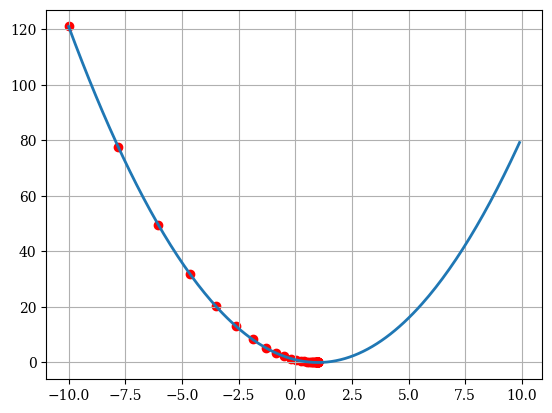

Minimum value of L(θ) is 7.845178011795908e-18  at θ =  0.9999999971990755


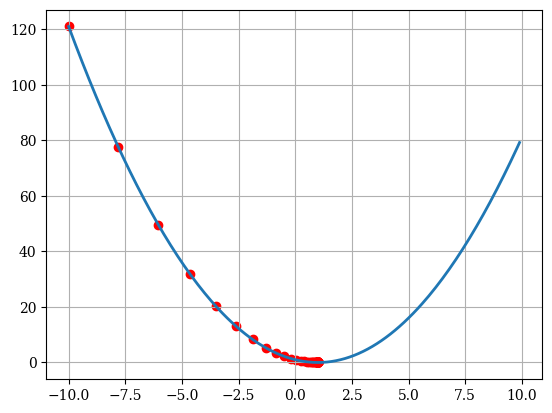

Minimum value of L(θ) is 3.5684910052415354e-16  at θ =  0.99999998110955


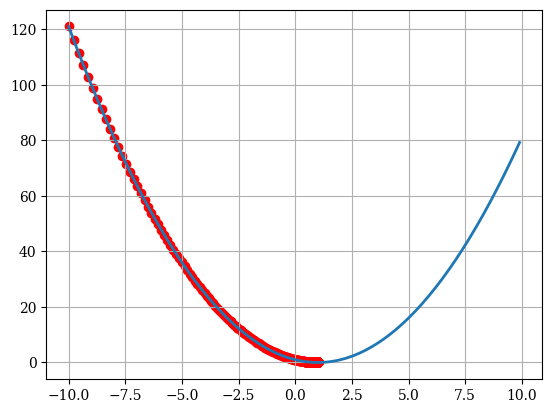

In [29]:
def L(theta):
    return (theta-1)**2


def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot = [startingVal]    
    for i in range(iterations - 1):
        gradientPlot.append(gradientPlot[-1] - alpha*2*(gradientPlot[-1]-1))
    gradientPlot = np.asarray(gradientPlot)
    return gradientPlot

def driverFunc(alpha,iterations):
    theta = np.arange(-10,10,0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iterPlot = gradientDescent(iterations,alpha,-10)
    print('Minimum value of L(θ) is', L(iterPlot[-1]), ' at θ = ', iterPlot[-1])
    plt.figure()
    plt.plot(theta, L_theta,  linewidth=2)
    plt.scatter(iterPlot,L(iterPlot),c='red')
    plt.grid()
    plt.show()

driverFunc(0.1,50)
driverFunc(0.1,100)
driverFunc(0.01,1000)

D). $L_4(\theta) = 2 * (\theta_1 - 1)^2 + 2 * (\theta_2 - 1)^2$


For alpha = 0.1 and iterations = 50:
Minimum value of L(θ1, θ2) is 5.879861387323954e-20  at θ1 =  1.0000000001212421  at θ2 =  1.0000000001212421


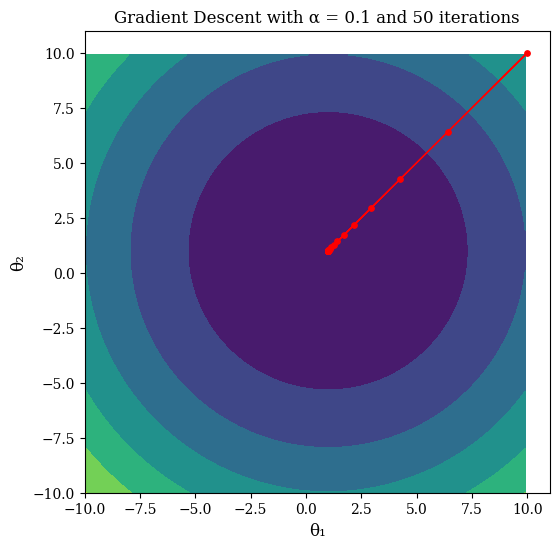

For alpha = 0.1 and iterations = 100:
Minimum value of L(θ1, θ2) is 1.9721522630525295e-31  at θ1 =  1.0000000000000002  at θ2 =  1.0000000000000002


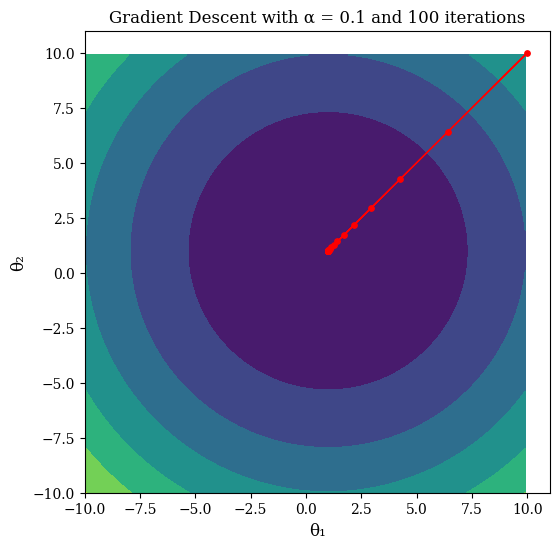

For alpha = 0.01 and iterations = 50:
Minimum value of L(θ1, θ2) is 5.930971649595571  at θ1 =  2.217679314269111  at θ2 =  2.217679314269111


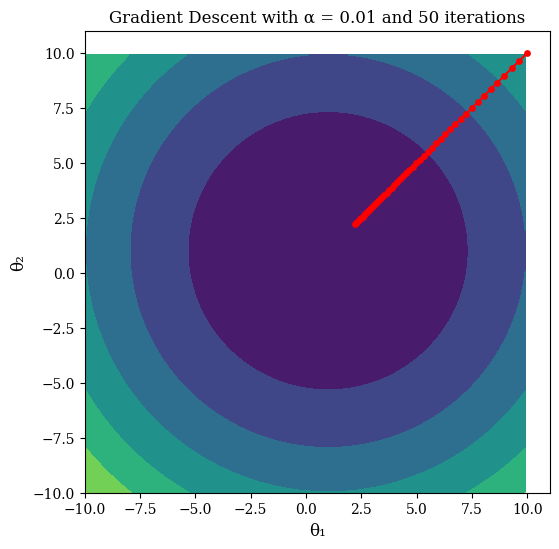

For alpha = 0.01 and iterations = 1000:
Minimum value of L(θ1, θ2) is 2.8398992587956425e-29  at θ1 =  1.0000000000000027  at θ2 =  1.0000000000000027


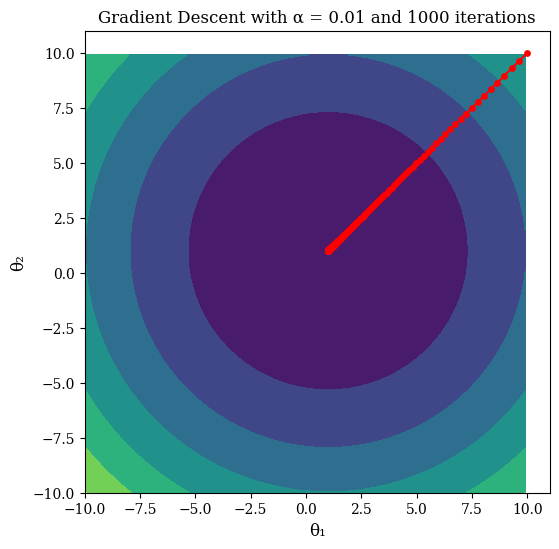

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def L(theta1, theta2):
    return 2*((theta1-1)**2 + (theta2-1)**2)

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*4*(gradientPlot1[-1]-1))
        gradientPlot2.append(gradientPlot2[-1] - alpha*4*(gradientPlot2[-1]-1))

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):
    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    ans1,ans2  = gradientDescent(iterations,alpha,10)

    print('Minimum value of L(θ1, θ2) is', L(ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])
    
    fig = plt.figure(figsize=(6,6))
    
    X, Y = np.meshgrid(theta1, theta2)
    Z = L(X,Y)
    
    plt.contourf(X,Y,Z,cmap='viridis')
    
    plt.scatter(ans1,ans2,c='red',s=15)
    
    plt.xlabel('θ₁', fontsize=12)
    plt.ylabel('θ₂', fontsize=12)
    
    plt.title(f'Gradient Descent with α = {alpha} and {iterations} iterations', fontsize=12)
    
    for i in range(len(ans1)-1):
        plt.arrow(ans1[i], ans2[i], ans1[i+1]-ans1[i], ans2[i+1]-ans2[i], head_width=0.02, head_length=0.02, fc='red', ec='red')
    
    plt.show()

print("For alpha = 0.1 and iterations = 50:")
driverFunc(0.1, 50)

print("For alpha = 0.1 and iterations = 100:")
driverFunc(0.1, 100)

print("For alpha = 0.01 and iterations = 50:")
driverFunc(0.01, 50)

print("For alpha = 0.01 and iterations = 1000:")
driverFunc(0.01, 1000)


E). $L_5(\theta) = \sum_{i=1}^{m} (y_i - (\theta_0 + \theta_1 * x_i))^2$


In [31]:
def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    return np.sum(y - (theta_0 + (theta_1*x)))

def derivativeFunc2(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + x[i]*(y[i] - (theta_0 + theta_1 * x[i] ))
    return ans 


def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y):
    
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(x,y,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(x,y,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):

    theta0 = np.arange(-50,50,0.5)
    theta1 = np.arange(-1,1,0.01)
    L_theta0_theta1 = np.zeros((len(theta1),len(theta0)))
    data = pd.read_excel(r'data.xlsx')
    X = data.x
    Y= data.y


    for i in range(len(theta1)):
        for j in range(len(theta0)):
            L_theta0_theta1[i][j] = L(data.x, data.y, theta0[j], theta1[i])


    ans1,ans2  = gradientDescent(iterations,alpha,50,0,X, Y)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(1e-11,1000)
driverFunc(1e-12,1000)
driverFunc(1e-12,5000)

Minimum value of L(θ1, θ2) is 1576.3391560950045  at θ1 =  49.999997117838255  at θ2 =  -0.008851835542843913
Minimum value of L(θ1, θ2) is 3588.012370125311  at θ1 =  49.99999767923025  at θ2 =  -0.007344317765876041
Minimum value of L(θ1, θ2) is 1576.3405601331215  at θ1 =  49.999997166533326  at θ2 =  -0.0088505764975341


## Q3

---

Find the minimum of the function $L(\theta) = \sum_{i=1}^{m} (y_i - (\theta_0 + \theta_1 * x_i))^2$ using the Stochastic Gradient Descent method. Use the data from the provided data file. Experiment with different learning rates and numbers of iterations.

---


In [32]:
import pandas as pd

def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    return np.sum(y - (theta_0 + theta_1 * x))

def derivativeFunc2(x, y, theta_0, theta_1):
    return np.sum(x*(y - (theta_0 + theta_1 * x)))

def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y,k):
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     
    for i in range(iterations - 1):
        tempIndex = np.random.randint(0,len(x),k)
        tempX = []
        tempY = []
        for j in tempIndex:
            tempX.append(x[j])
            tempY.append(y[j])
        tempX = np.array(tempX)
        tempY = np.array(tempY)
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations,k):
    data = pd.read_excel(r'data.xlsx')
    ans1,ans2  = gradientDescent(iterations,alpha,1,0,data.x, data.y,k)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

print("For alpha = 0.000000001, iterations = 10000, k = 5")
driverFunc(1e-8,10000,5)

print("For alpha = 0.0000000001, iterations = 10000, k = 10")
driverFunc(1e-9,10000,10)

print("For alpha = 0.00000001, iterations = 50000, k = 5")
driverFunc(1e-9,50000,5)

print("For alpha = 0.00001, iterations = 50000, k = 10")
driverFunc(1e-9,50000,10)


For alpha = 0.000000001, iterations = 10000, k = 5
Minimum value of L(θ1, θ2) is 16931.410113030728  at θ1 =  1.0032741173494248  at θ2 =  0.0073845922890875245
For alpha = 0.0000000001, iterations = 10000, k = 10
Minimum value of L(θ1, θ2) is 16340.453446312335  at θ1 =  1.0006560730954155  at θ2 =  0.006563410001912172
For alpha = 0.00000001, iterations = 50000, k = 5
Minimum value of L(θ1, θ2) is 16352.417835018034  at θ1 =  1.0016331310335604  at θ2 =  0.006447725962200712
For alpha = 0.00001, iterations = 50000, k = 10
Minimum value of L(θ1, θ2) is 16367.313356874349  at θ1 =  1.0032561122523576  at θ2 =  0.0063870835095221415


## Q4

---

## Use the Steepest Descent method to find the minima of the following functions:


a). $L_1(\theta) = \theta^2$

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def steepest_descent(f, grad_f, theta_0, alpha=0.1, epsilon=1e-7, max_iterations=10000):
    theta = theta_0
    costs = []
    for i in range(max_iterations):
        cost = f(theta)
        costs.append(cost)
        gradient = grad_f(theta)
        theta = theta - alpha * gradient
        if np.linalg.norm(gradient) < epsilon:
            break
    return theta, costs

def L1(theta):
    return theta**2


def grad_L1(theta):
    return 2*theta


theta_0 = np.array([10])
theta_min, costs = steepest_descent(L1, grad_L1, theta_0)
print(f"Minima of L1 at Theta 1: {theta_min}")
print(f"Final value of L1: {L1(theta_min)}")


Minima of L1 at Theta 1: [3.70534686e-08]
Final value of L1: [1.37295953e-15]


b). $L_2(\theta) = \theta_1^2 + \theta_2^2$


In [66]:
def L2(theta):
    return theta[0]**2 + theta[1]**2


def grad_L2(theta):
    return 2*theta


theta_0 = np.array([10, 10])
theta_min, costs = steepest_descent(L2, grad_L2, theta_0)
print(f"Minima of L2 at Theta_1: {theta_min[0]} and Theta_2: {theta_min[1]}")
print(f"Final value of L2: {L2(theta_min)}")

Minima of L2 at Theta_1: 2.3714219875802372e-08 and Theta_2: 2.3714219875802372e-08
Final value of L2: 1.1247284486358005e-15


c). $L_3(\theta) = (\theta - 1)^2$


In [67]:

def L3(theta):
    return (theta - 1)**2


def grad_L3(theta):
    return 2*(theta - 1)


theta_0 = np.array([5])
theta_min, costs = steepest_descent(L3, grad_L3, theta_0)
print(f"Minima of L3 at Theta 1: {theta_min}")
print(f"Final value of L3: {L3(theta_min)}")


Minima of L3 at Theta 1: [1.00000004]
Final value of L3: [1.30935624e-15]


d). $L_4(\theta) = 2 * (\theta_1 - 1)^2 + 2 * (\theta_2 - 1)^2$


In [68]:
def L4(theta):
    return 2*(theta[0]-1)**2 + 2*(theta[1]-1)**2


def grad_L4(theta):
    return 4*(theta-1)



theta_0 = np.array([0,0])
theta_min, costs = steepest_descent(L4, grad_L4, theta_0)
print(f"Minima of L5 at Theta_1: {theta_min[0]} and Theta_2: {theta_min[1]}")
print(f"Final value of L5: {L4(theta_min)}")



Minima of L5 at Theta_1: 0.9999999896855752 and Theta_2: 0.9999999896855752
Final value of L5: 4.2554943241478935e-16


e). $L_5(\theta) = \sum_{i=1}^{m} (y_i - (\theta_0 + \theta_1 * x_i))^2$


In [69]:

# Function e
def L5(theta, X, y):
    m = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2)
    return cost

def grad_L5(theta, X, y):
    m = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    grad = (1/m) * X.T.dot(error)
    return grad

X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([3, 4, 5])
theta_0 = np.array([0.5, 0.5])
theta_min, costs = steepest_descent(lambda theta: L5(theta, X, y), lambda theta: grad_L5(theta, X, y), theta_0)

print(f"Minima of L5 at Theta_0: {theta_min[0]} and Theta_1: {theta_min[1]}")
print(f"Final value of L5: {L5(theta_min, X, y)}")


Minima of L5 at Theta_0: 1.9999992493947563 and Theta_1: 1.000000330192535
Final value of L5: 4.041220997038374e-14


## Q5

---

The following question is to aid your understanding of gradient descent with the help of some visualization. Consider the data X and Y as given below.

$X = \begin{bmatrix} 1 \\ 3 \\ 6 \end{bmatrix}$ $Y = \begin{bmatrix} 6 \\ 10 \\ 16 \end{bmatrix}$

---


A). Create a contour plot in the $\theta_0$ and $\theta_1$ space of the residual sum of squares.


2029.3426453636594
0.003610351308774029


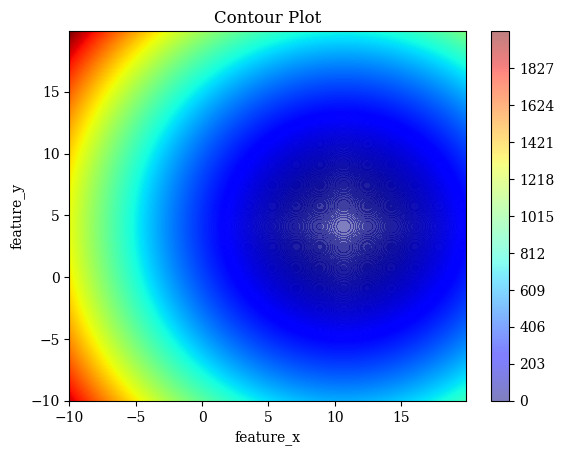

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 5a
x_values = np.array([[1], [3], [6]])
y_values = np.array(([6], [10], [16]))
mean = np.mean(x_values)
standard_deviation = np.std(x_values)
x_values = (x_values - mean)/standard_deviation
theta_0_range = np.arange(-10, 20, 0.1)
theta_1_range = np.arange(-10, 20, 0.1)
meshgrid_x, meshgrid_y = np.meshgrid(theta_0_range, theta_1_range)
L_matrix = np.zeros((np.size(theta_1_range), np.size(theta_0_range)))
for i in range(np.size(theta_1_range)):
    for j in range(np.size(theta_0_range)):
        L_matrix[i][j] = np.sum(
            np.square(y_values - (theta_0_range[j] + (theta_1_range[i]*x_values))))

# plots contour lines
maxz = np.amax(L_matrix)
print(maxz)
minz = np.amin(L_matrix)
print(minz)
levels = np.linspace(minz, maxz, 2500)

fig = plt.figure()
ax = fig.add_subplot()
im = ax.contourf(meshgrid_x, meshgrid_y, L_matrix,
                 levels=levels, cmap="jet", alpha=0.5)
cbar = fig.colorbar(im)

ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

plt.show()

B). Create a Matplotlib animation where the plot contains two columns: the first one being the contour plot and the second one being the linear regression fit on the data. The different frames in the animation correspond to different iterations of gradient descent applied on the dataset to learn $\theta_0$ and $\theta_1$. For each iteration, draw the current value of $\theta_0$ and $\theta_1$ on the contour plot and also an arrow to the next $\theta_0$ and $\theta_1$ as learned by the gradient update rule. Correspondingly draw the $y = \theta_0 + \theta_1*x$ line on the other subplot showing the scatter plot. The overall title of the plot shows the iteration number and the residual sum of squares. You are free to use any gradient descent implementation i.e. your own or using libraries like scikit-learn.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Data
X = np.array([[1], [3], [6]])
Y = np.array(([6], [10], [16]))

# Normalize X values
mu = np.mean(X)
sig = np.std(X)
X = (X - mu)/sig

# Parameters for gradient descent
alpha = 0.1
iterations = 100

# Initialize q0 and q1
q0 = 0
q1 = 0

# Compute the cost function


def compute_cost(q0, q1):
    return np.sum(np.square(Y - (q0 + q1*X)))/(2*len(Y))

# Compute the gradient of the cost function


def gradient(q0, q1):
    dJ_dq0 = -np.sum(Y - (q0 + q1*X))/len(Y)
    dJ_dq1 = -np.sum((Y - (q0 + q1*X))*X)/len(Y)
    return dJ_dq0, dJ_dq1

# Gradient descent update rule


def update_q(q0, q1):
    dJ_dq0, dJ_dq1 = gradient(q0, q1)
    q0_new = q0 - alpha*dJ_dq0
    q1_new = q1 - alpha*dJ_dq1
    return q0_new, q1_new


# Create a contour plot in the q0 and q1 space of residual sum of squares.
theta_0_range = np.arange(-10, 25, 0.01)
theta_1_range = np.arange(-10, 25, 0.01)
meshgrid_x, meshgrid_y = np.meshgrid(theta_0_range, theta_1_range)
L_matrix = np.zeros((np.size(theta_1_range), np.size(theta_0_range)))
for i in range(np.size(theta_1_range)):
    for j in range(np.size(theta_0_range)):
        L_matrix[i][j] = np.sum(
            np.square(Y - (theta_0_range[j] + (theta_1_range[i]*X))))

fig = plt.figure(figsize=(12, 6))

# Create subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot contour plot on first subplot
contour_plot = ax1.contour(meshgrid_x, meshgrid_y, L_matrix)
point_plot, = ax1.plot([], [], 'ro')
arrow_plot = ax1.scatter([], [], marker='o', s=200,
                         facecolors='none', edgecolors='r')

# Plot linear regression fit on second subplot
scatter_plot = ax2.scatter(X, Y)
line_plot, = ax2.plot([], [], 'r')


def animate(i):
    global q0, q1
    global prev_q  # Add this line to make prev_q a global variable

    # Initialize prev_q before it is used
    if i == 0:
        prev_q = [q0, q1]

    # Update title with iteration number and residual sum of squares
    fig.suptitle(
        f'Iteration: {i+1}, Residual Sum of Squares: {compute_cost(q0,q1)}')

    # Update point on contour plot
    point_plot.set_data(q0, q1)

    # Update arrow on contour plot
    if i > 0:
        arrow_plot.set_offsets([[prev_q[0], prev_q[1]]])
        ax1.annotate("", xy=(q0, q1), xytext=(prev_q[0], prev_q[1]),
                     arrowprops=dict(arrowstyle="->", color='r'))

    # Update line on linear regression fit plot
    line_plot.set_data(X.flatten(), (q0+q1*X).flatten())

    # Update q values using gradient descent update rule
    prev_q = [q0, q1]
    q0, q1 = update_q(q0, q1)


animation = FuncAnimation(fig, animate,
                          frames=iterations)

animation.save('gradient_descent.gif', writer='imagemagick')


### Iteration vs Residual Sum of Squares Contour Plot

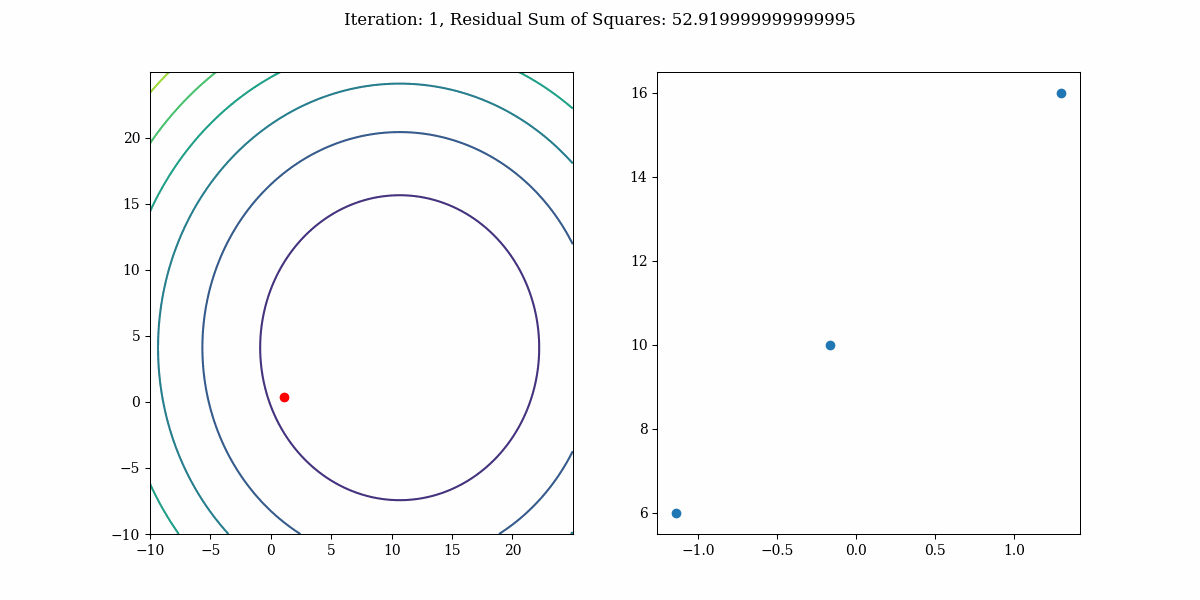
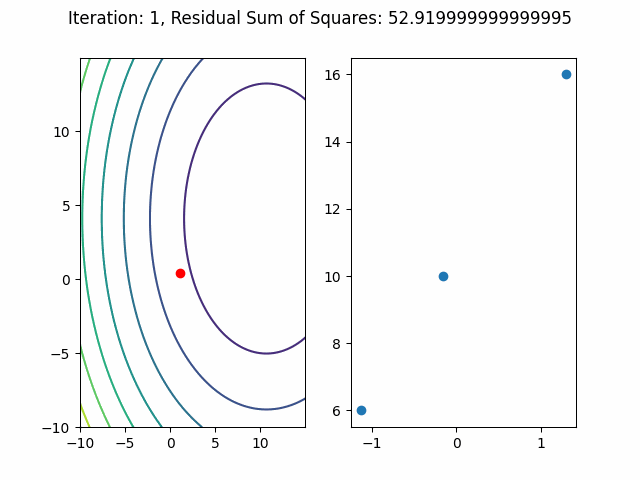